In [1]:
import os
import warnings

import datetime
import time
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore",category=mpl.MatplotlibDeprecationWarning)
sns.set_style('darkgrid')

## 1. Economy class passengers: Melbourne-Sydney

page 29

In [2]:
def getDateRangeFromWeek(date_info):
    
    year = date_info.split(' ')[0]
    week = date_info.split(' ')[1].split('W')[1]

    firstdayofweek = datetime.datetime.strptime(f'{year}-W{int(week)- 1}-1', "%Y-W%W-%w").date()
    return firstdayofweek

In [3]:
data_path = 'data/melsyd.csv'

data = pd.read_csv(data_path)

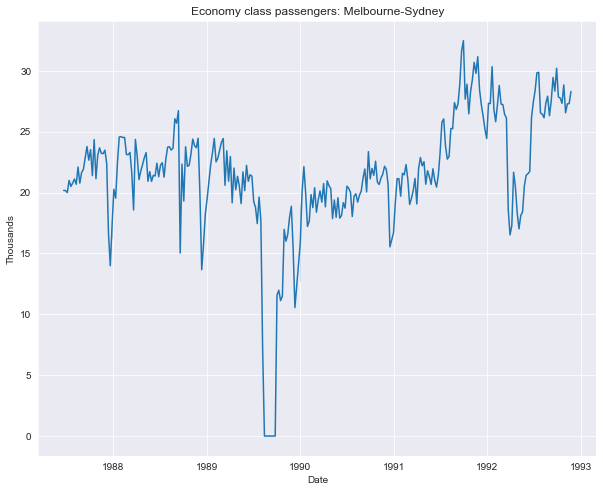

In [4]:
data['date'] = data['index'].apply(lambda x: getDateRangeFromWeek(x))
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

plt.figure(figsize=(10, 8))

viz = sns.lineplot(data=data, x='date', y='Economy.Class')

plt.title('Economy class passengers: Melbourne-Sydney')
plt.xlabel('Date')
plt.ylabel('Thousands')

plt.show()

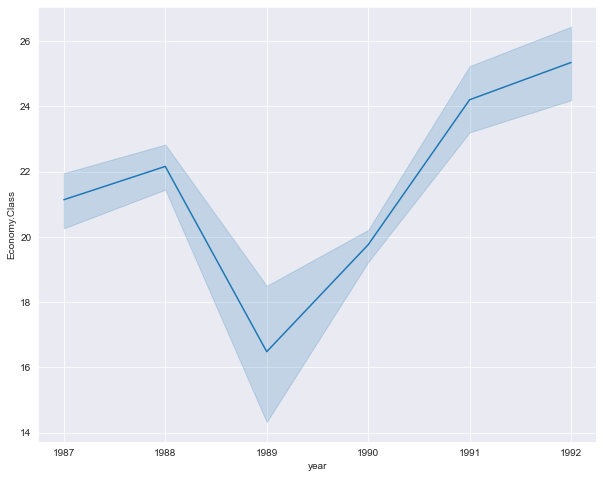

In [5]:
plt.figure(figsize=(10, 8))

sns.lineplot(data=data, x='year', y='Economy.Class')

plt.show()

## 2. Antidiabetic drug sales

page 30

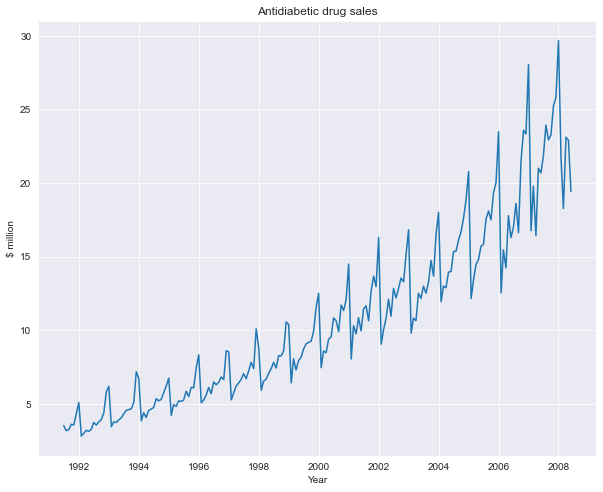

In [6]:
data_path = 'data/a10.csv'

data = pd.read_csv(data_path)

data['date'] = pd.to_datetime(data['index'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

plt.figure(figsize=(10, 8))

viz = sns.lineplot(data=data, x='date', y='value')

plt.title('Antidiabetic drug sales')
plt.xlabel('Year')
plt.ylabel('$ million')

plt.show()

## 3. Seasonal Plot: Antidiabetic drug sales

Page 34

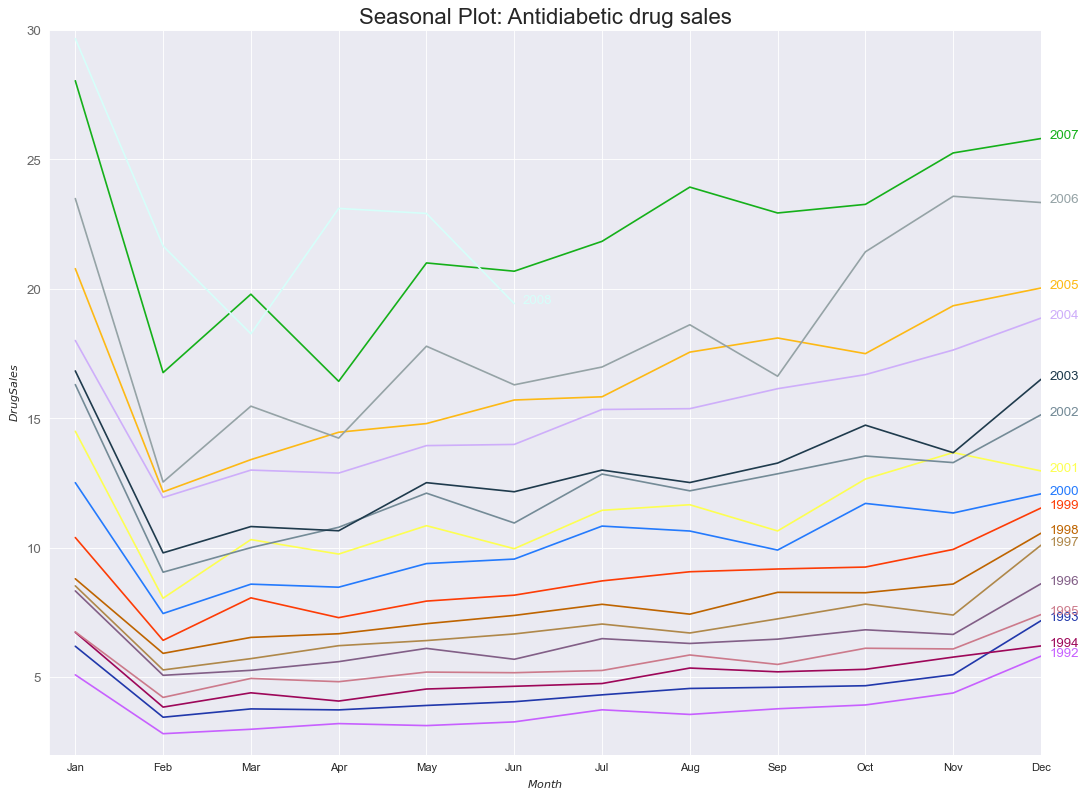

In [7]:
data_path = 'data/a10.csv'

data = pd.read_csv(data_path)

# Prepare data
data['year'] = data['index'].apply(lambda x: x.split(' ')[0])
data['month'] = data['index'].apply(lambda x: x.split(' ')[1])

years = data['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=data.loc[data.year==y, :], color=mycolors[i], label=y)
        plt.text(data.loc[data.year==y, :].shape[0]-.9, data.loc[data.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot: Antidiabetic drug sales", fontsize=20)
plt.show()

Page 37

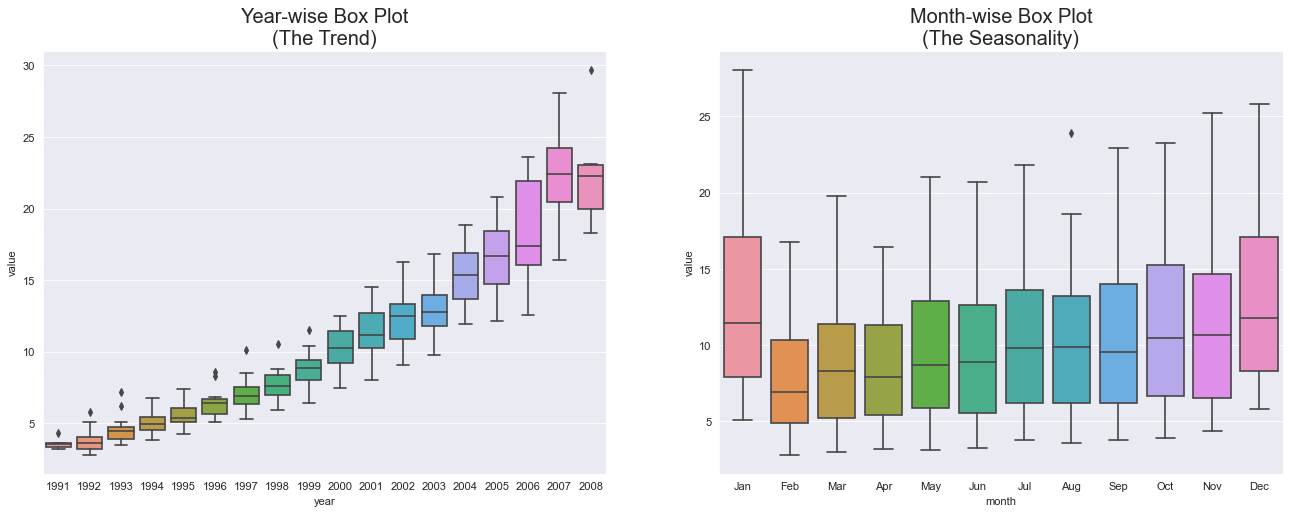

In [8]:
data_path = 'data/a10.csv'

data = pd.read_csv(data_path)

# Prepare data
data['month'] = data['index'].apply(lambda x: x.split(' ')[1])
data['date'] = pd.to_datetime(data['index'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['month_int'] = pd.DatetimeIndex(data['date']).month

data_month = data.sort_values('month_int')

years = data['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=data, ax=axes[0])
sns.boxplot(x='month', y='value', data=data_month.loc[~data.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()



## 4. Scatterplots

Page 38

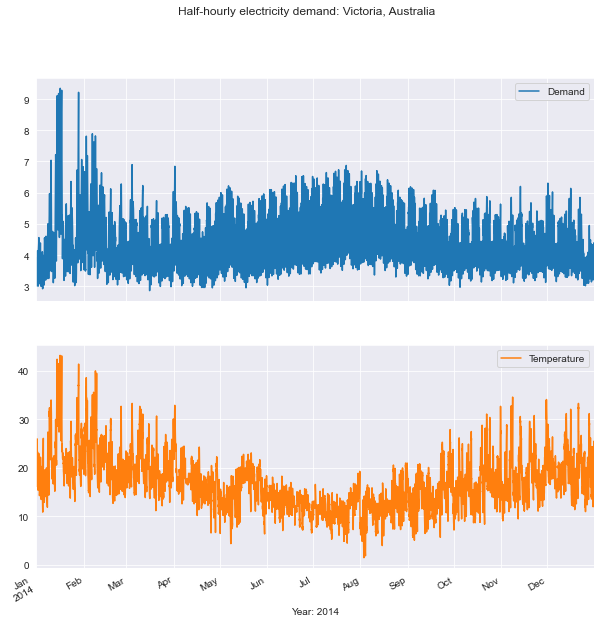

In [9]:
data = pd.read_csv("./data/elecdemand.csv")
data['index'] = pd.to_datetime(data['index'])
data = data.set_index('index')

data.drop('WorkDay', axis=1).plot(kind='line', subplots=True, figsize=(10,10))

plt.suptitle('Half-hourly electricity demand: Victoria, Australia')
plt.xlabel('Year: 2014')

plt.show()

Page 39

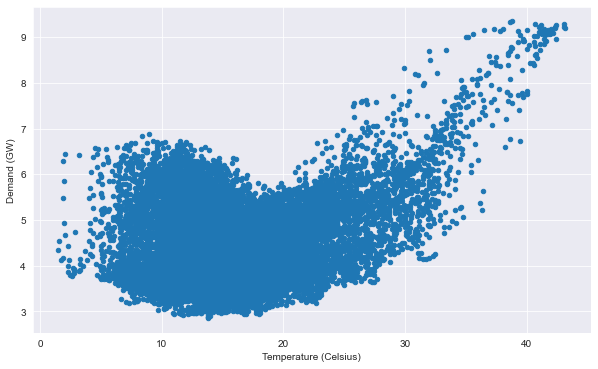

In [10]:
data.plot(kind='scatter', x='Temperature', y='Demand', figsize=(10,6))

plt.xlabel('Temperature (Celsius)')
plt.ylabel('Demand (GW)')

plt.show()

## 5. Scatterplot matrices

Page 42

In [11]:
data = pd.read_csv("./data/visnights.csv")

data['index'] = data['index'].apply(lambda x: x.replace(' ', '-'))
qs = data['index'].tolist()

data['date'] = pd.PeriodIndex(qs, freq='Q').to_timestamp()
data.set_index('date', inplace=True)
data.drop('index', axis=1, inplace=True)

In [12]:
data.head()

,NSWMetro,NSWNthCo,NSWSthCo,NSWSthIn,NSWNthIn,QLDMetro,QLDCntrl,QLDNthCo,SAUMetro,SAUCoast,SAUInner,VICMetro,VICWstCo,VICEstCo,VICInner,WAUMetro,WAUCoast,WAUInner,OTHMetro,OTHNoMet
date,,,,,,,,,,,,,,,,,,,,
1998-01-01,9.047095,8.565678,5.818029,2.679538,2.977507,12.106052,2.748374,2.137234,2.881372,2.591997,0.894877,7.490382,2.442005,3.381972,5.326655,3.075779,3.066555,0.694995,3.437924,2.073469
1998-04-01,6.962126,7.124468,2.466437,3.010732,3.477703,7.786687,4.040915,2.269596,2.124736,1.375780,0.979251,5.198178,0.960505,1.827940,4.441119,2.154929,3.334405,0.557680,2.677081,1.787939
1998-07-01,6.871963,4.716893,1.928053,3.328869,3.014770,11.380024,5.343964,4.890227,2.284870,1.079542,0.980329,5.244217,0.755974,1.351952,3.815645,2.787286,4.365844,1.006184,3.793743,2.345021
1998-10-01,7.147293,6.269299,2.797556,2.417772,3.757972,9.311460,4.260419,2.621548,1.785889,1.497664,1.509434,6.274246,1.271604,1.493415,3.859567,2.752910,4.521996,1.172551,3.304231,1.943689
1999-01-01,7.956923,9.493901,4.853681,3.224285,3.790760,12.671942,4.186113,2.483203,2.293873,2.247684,0.963523,9.187422,2.385058,2.896929,4.588755,3.519564,3.579347,0.398183,3.510819,2.165838


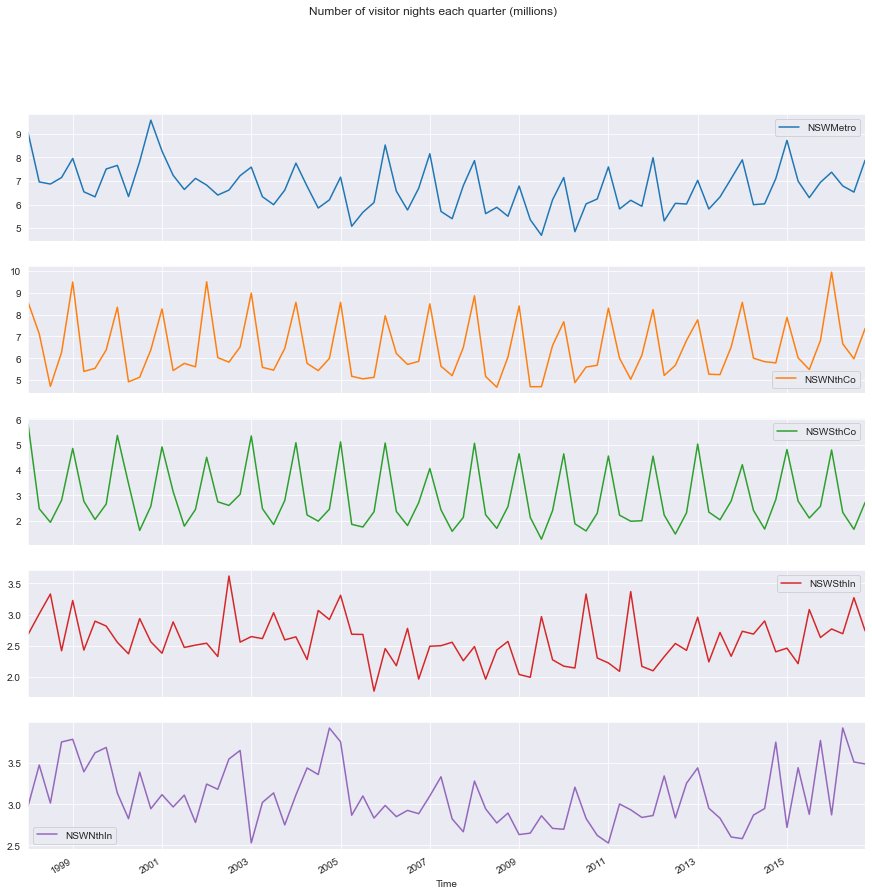

In [13]:
data.iloc[:,:5].plot(subplots=True, figsize=(15,15))

plt.xlabel('Time')
plt.suptitle('Number of visitor nights each quarter (millions)')
plt.show()

Page 43

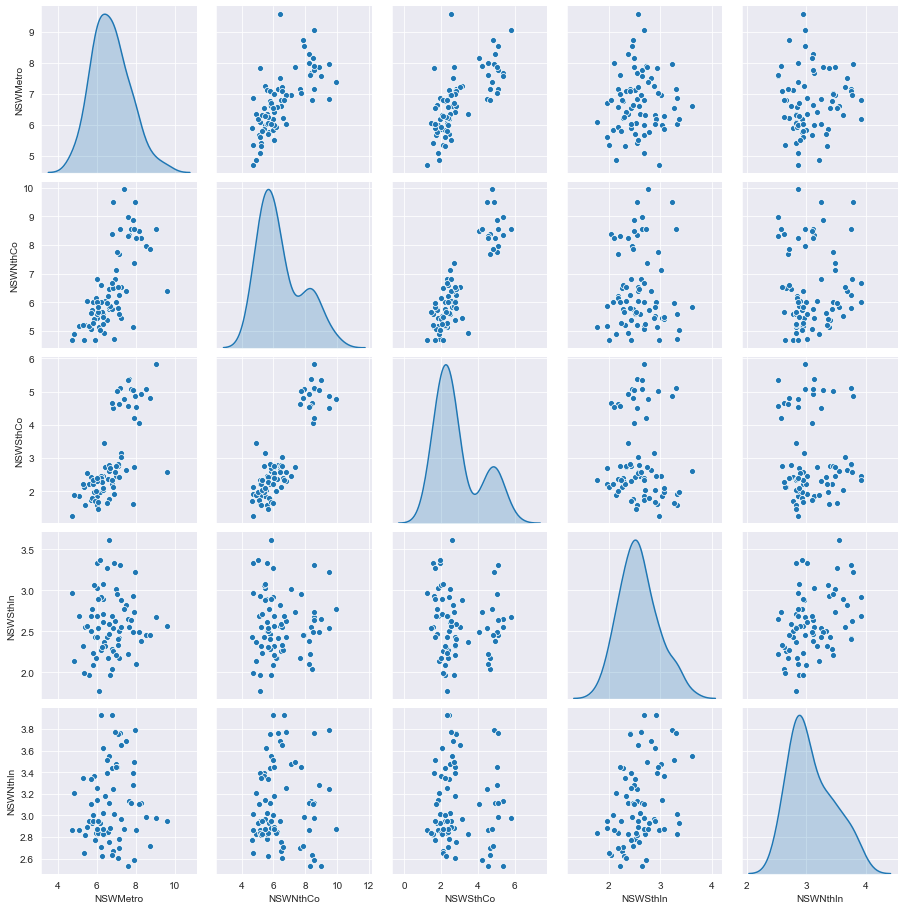

In [14]:
sns.pairplot(data.iloc[:,:5], diag_kind="kde")

plt.show()

## 6. Lag plots

Page 45

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In [16]:
data = pd.read_csv("./data/ausbeer.csv")

data['index'] = data['index'].apply(lambda x: x.replace(' ', '-'))
qs = data['index'].tolist()

data['date'] = pd.PeriodIndex(qs, freq='Q').to_timestamp()
data['year'] = pd.DatetimeIndex(data['date']).year
data['quarter'] = data['index'].apply(lambda x: x.split('-')[1])

In [17]:
data.head()

,index,value,date,year,quarter
0,1956-Q1,284,1956-01-01,1956,Q1
1,1956-Q2,213,1956-04-01,1956,Q2
2,1956-Q3,227,1956-07-01,1956,Q3
3,1956-Q4,308,1956-10-01,1956,Q4
4,1957-Q1,262,1957-01-01,1957,Q1


In [18]:
data_sub = data[data['year']>=1992]

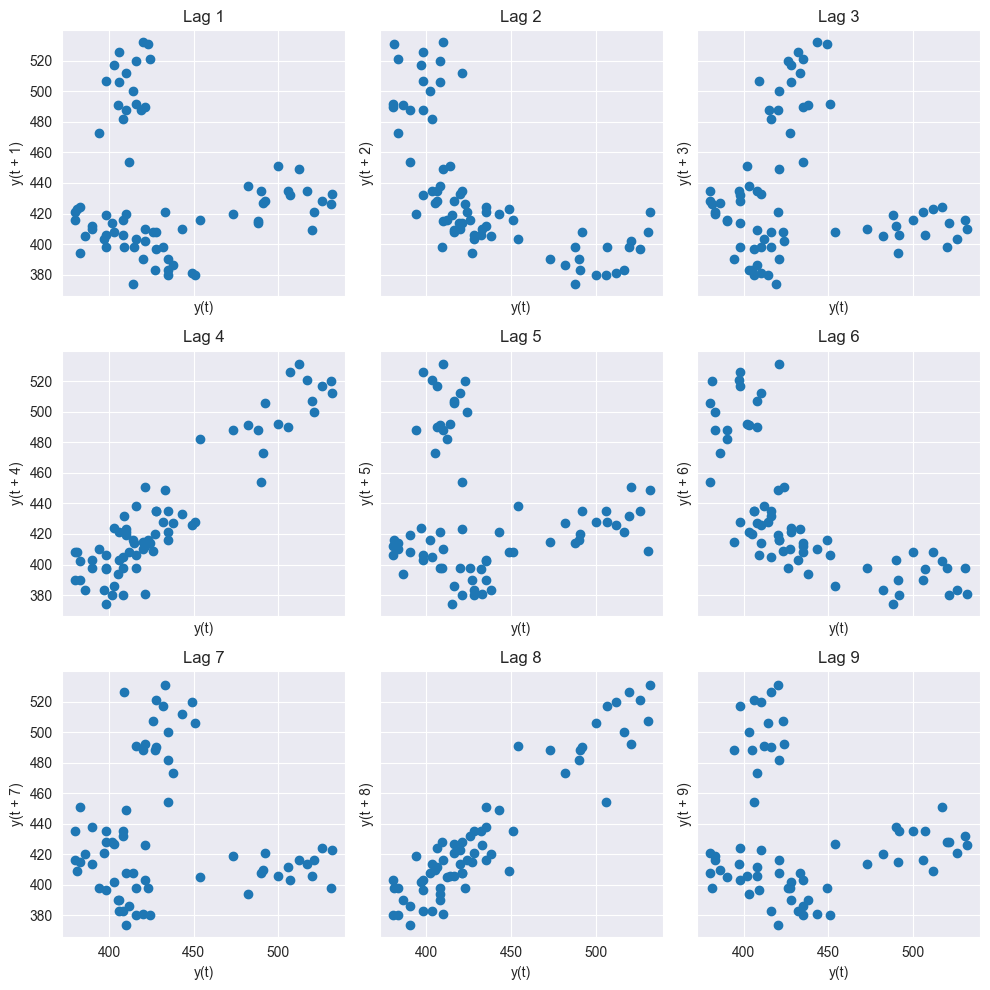

In [19]:
# Plot
viz, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True,  dpi=100)
for i, ax in enumerate(axes.flatten()[:9]):
    lag_plot(data_sub['value'], lag=i+1, ax=ax)
    ax.set_title('Lag ' + str(i+1))
    
plt.tight_layout()
plt.show()

## 7. Autocorrelation

Page 48

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

/Users/khor.eanyee/miniconda3/envs/simfin/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


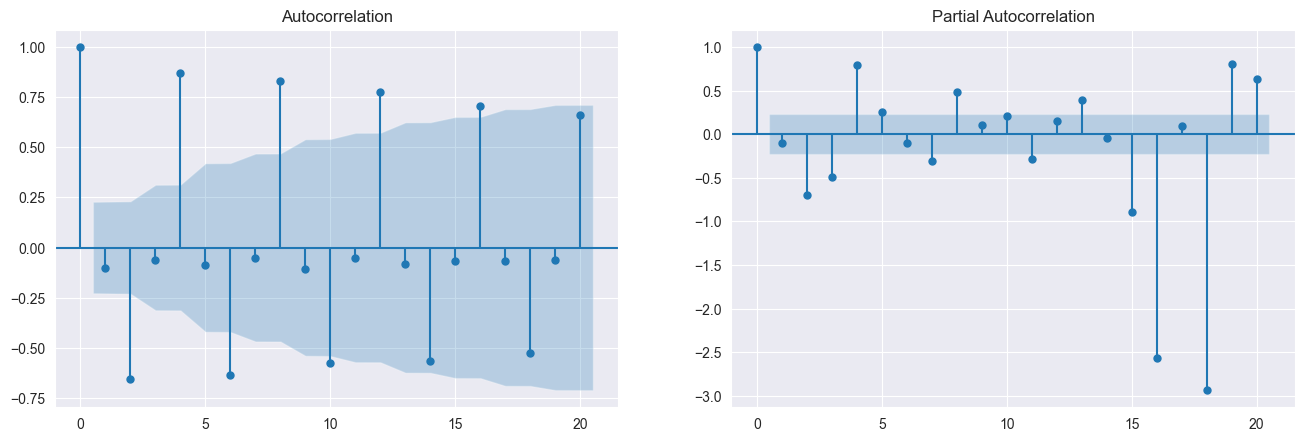

In [20]:
# Draw Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), dpi= 100)
plot_acf(data_sub['value'].tolist(), lags=20, ax=axes[0])
plot_pacf(data_sub['value'].tolist(), lags=20, ax=axes[1])

plt.show()

In [21]:
# ## Calculate ACF and PACF upto 20 lags
# acf = acf(data_sub['value'], nlags=20, fft=False)
# pacf = pacf(data_sub['value'], nlags=20)

# print(acf)
# print(pacf)

**Observation from autocorrelation**
- r4 is higher than for the other lags. This is due to the seasonal pattern in the data: the peaks tend to be four quarters apart and the troughs tend to be two quarters apart.

- r2 is more negative than for the other lags because troughs tend to be two quarters apart.

## 8. Trend and seasonality in ACF plots

Page 49

In [22]:
data = pd.read_csv("./data/elec.csv")

data['date'] = pd.to_datetime(data['index'])
data['year'] = pd.DatetimeIndex(data['date']).year

data.head()

,index,value,date,year
0,Jan 1956,1254,1956-01-01,1956
1,Feb 1956,1290,1956-02-01,1956
2,Mar 1956,1379,1956-03-01,1956
3,Apr 1956,1346,1956-04-01,1956
4,May 1956,1535,1956-05-01,1956


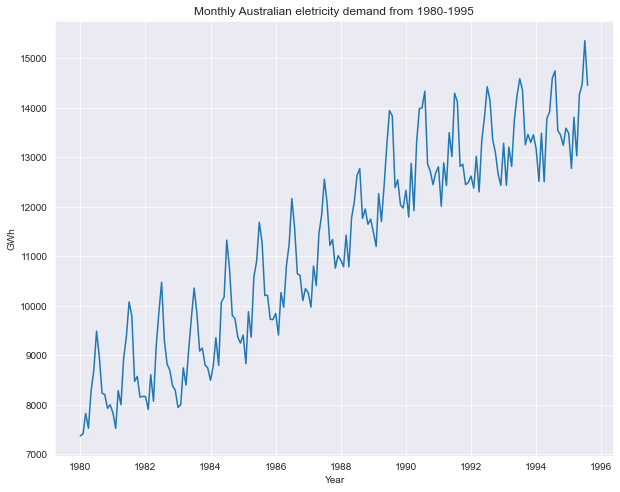

In [23]:
data_sub = data[data['year']>=1980]

plt.figure(figsize=(10, 8))

sns.lineplot(data=data_sub, x='date', y='value')

plt.title('Monthly Australian eletricity demand from 1980-1995')
plt.xlabel('Year')
plt.ylabel('GWh')

plt.show()

/Users/khor.eanyee/miniconda3/envs/simfin/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


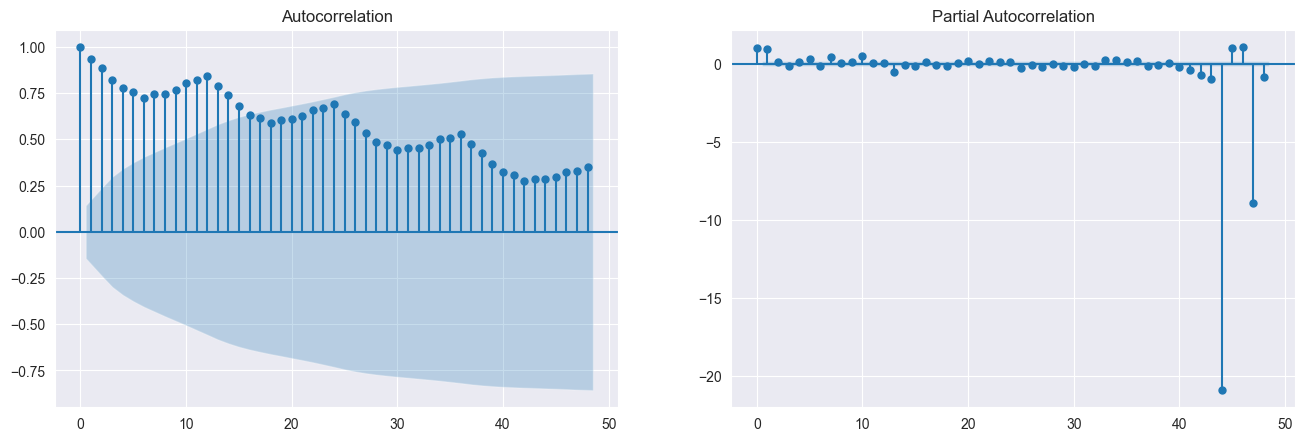

In [24]:
# Draw Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), dpi= 100)
plot_acf(data_sub['value'].tolist(), lags=48, ax=axes[0])
plot_pacf(data_sub['value'].tolist(), lags=48, ax=axes[1])

plt.show()

**Observation from autocorrelation**
- The slow decrease in the ACF as the lags increase is due to the trend.

- The 'scalloped' shape is due to the seasonality.

## 9. White noise

Page 50

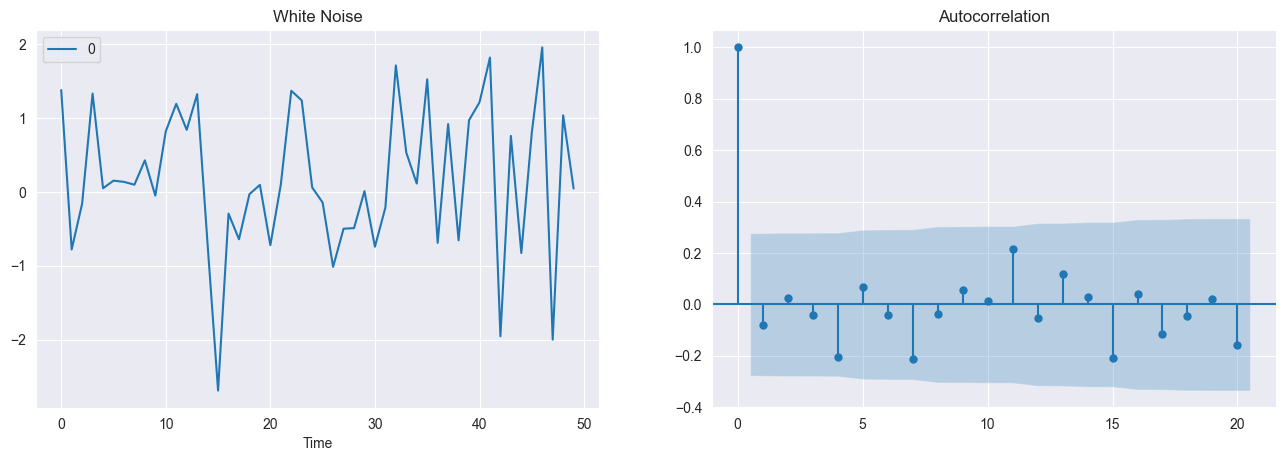

In [25]:
np.random.seed = 0

data = pd.DataFrame(np.random.normal(size=50))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), dpi= 100)
data.plot(kind='line', ax=axes[0])
plot_acf(data[0].tolist(), lags=20, ax=axes[1])

axes[0].set_title('White Noise')
axes[0].set_xlabel('Time')

plt.show()

For white noise series, we expect 95% of the spikes in the ACF to lie within $\pm2/\sqrt(T)$. 

In this case, $T=50$, so the bounds are at $\pm2/\sqrt(50)=\pm0.28$.

---

## Reference

1. "Forecasting: Principles and Practice" by Rob J Hyndman and George Athanasopoulos
2. https://github.com/mlmarenchino/forecasting/blob/master/Chapter%202%20-%20Time%20series%20graphics.ipynb